In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import datetime, os

In [ ]:
%load_ext tensorboard

In [3]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


In [9]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#2. Get the file
downloaded = drive.CreateFile({'id':"1aTLZqybXHy5v7ONRvMCqGZPPKSABQgnP"})   # replace the id with id of file you want to access
downloaded.GetContentFile('time_series_covid19_confirmed_global.csv')
downloaded

GoogleDriveFile({'id': '1aTLZqybXHy5v7ONRvMCqGZPPKSABQgnP', 'kind': 'drive#file', 'etag': '"MTYyNDA1NDg1MjAwMA"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1aTLZqybXHy5v7ONRvMCqGZPPKSABQgnP', 'webContentLink': 'https://drive.google.com/uc?id=1aTLZqybXHy5v7ONRvMCqGZPPKSABQgnP&export=download', 'alternateLink': 'https://drive.google.com/file/d/1aTLZqybXHy5v7ONRvMCqGZPPKSABQgnP/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/1aTLZqybXHy5v7ONRvMCqGZPPKSABQgnP/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/text/csv', 'title': 'time_series_covid19_confirmed_global.csv', 'mimeType': 'text/csv', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2021-06-18T22:30:30.046Z', 'modifiedDate': '2021-06-18T22:20:52.000Z', 'modifiedByMeDate': '2021-06-18T22:20:52.000Z', 'lastViewedByMeDate': '2021-06-18T22:30:30.046Z', 'mar

In [10]:
covid19_data = pd.read_csv('time_series_covid19_confirmed_global.csv')
covid19_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272,93288,96531
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469,132476,132481
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115,134458,134840
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828,13836,13839
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921,37094,37289


In [11]:
covid19_data.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
6/13/21             int64
6/14/21             int64
6/15/21             int64
6/16/21             int64
6/17/21             int64
Length: 517, dtype: object

In [12]:
new_covid19_data = covid19_data.melt(id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'], var_name = 'Date', value_name = 'Confirmed')
new_covid19_data['Date'] = pd.to_datetime(new_covid19_data['Date'], format ='%m/%d/%y')
new_covid19_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0


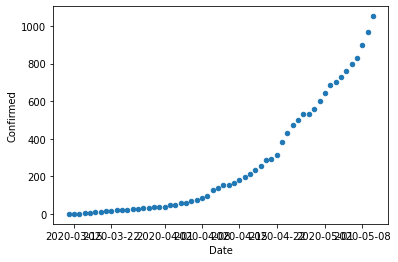

In [13]:
GT_confirmed = new_covid19_data[(new_covid19_data["Country/Region"] == 'Guatemala') & (new_covid19_data["Confirmed"] > 0)].copy()
GT_confirmed[GT_confirmed.Date <= '2020-05-10'].plot.scatter(x = "Date",y="Confirmed")

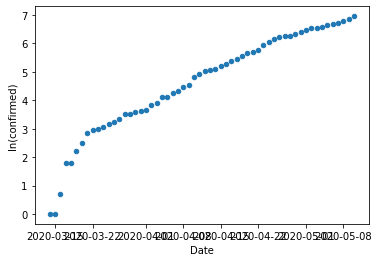

In [14]:
GT_confirmed["ln(confirmed)"] = np.log(GT_confirmed["Confirmed"])
GT_confirmed[GT_confirmed.Date <= '2020-05-10'].plot.scatter(x = "Date", y = "ln(confirmed)")

In [15]:
GT_confirmed.head(20)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,ln(confirmed)
14594,NaN,Guatemala,15.7835,-90.2308,2020-03-14,1,0.000000
14872,NaN,Guatemala,15.7835,-90.2308,2020-03-15,1,0.000000
15150,NaN,Guatemala,15.7835,-90.2308,2020-03-16,2,0.693147
15428,NaN,Guatemala,15.7835,-90.2308,2020-03-17,6,1.791759
15706,NaN,Guatemala,15.7835,-90.2308,2020-03-18,6,1.791759
15984,NaN,Guatemala,15.7835,-90.2308,2020-03-19,9,2.197225
16262,NaN,Guatemala,15.7835,-90.2308,2020-03-20,12,2.484907
16540,NaN,Guatemala,15.7835,-90.2308,2020-03-21,17,2.833213
16818,NaN,Guatemala,15.7835,-90.2308,2020-03-22,19,2.944439
17096,NaN,Guatemala,15.7835,-90.2308,2020-03-23,20,2.995732


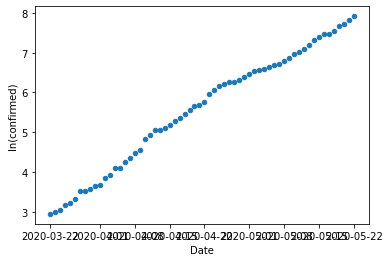

In [16]:
subGT_Confirmed = GT_confirmed[ (GT_confirmed.Date >= '2020-03-22') & (GT_confirmed.Date <= '2020-05-22')].copy()
subGT_Confirmed.plot.scatter(x = 'Date', y = 'ln(confirmed)')

In [30]:
subGT_Confirmed['day_number'] = GT_confirmed.Date - datetime.datetime.strptime('2020-03-22', '%Y-%m-%d')
subGT_Confirmed['day_number'] = subGT_Confirmed.day_number.dt.days

In [31]:
subGT_Confirmed.head(20)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,ln(confirmed),day_number
16818,NaN,Guatemala,15.7835,-90.2308,2020-03-22,19,2.944439,0
17096,NaN,Guatemala,15.7835,-90.2308,2020-03-23,20,2.995732,1
17374,NaN,Guatemala,15.7835,-90.2308,2020-03-24,21,3.044522,2
17652,NaN,Guatemala,15.7835,-90.2308,2020-03-25,24,3.178054,3
17930,NaN,Guatemala,15.7835,-90.2308,2020-03-26,25,3.218876,4
18208,NaN,Guatemala,15.7835,-90.2308,2020-03-27,28,3.332205,5
18486,NaN,Guatemala,15.7835,-90.2308,2020-03-28,34,3.526361,6
18764,NaN,Guatemala,15.7835,-90.2308,2020-03-29,34,3.526361,7
19042,NaN,Guatemala,15.7835,-90.2308,2020-03-30,36,3.583519,8
19320,NaN,Guatemala,15.7835,-90.2308,2020-03-31,38,3.637586,9


In [32]:
def error(y_real,y_aprox):
  return 1/2*tf.reduce_mean(tf.math.square(y_real - y_aprox) )

In [104]:
class ModeloLineal:
  def __init__(self):
    tf.reset_default_graph()
    self.m = tf.get_variable("pendient",dtype=tf.float32, shape=[],initializer=tf.zeros_initializer())
    self.b = tf.get_variable("intercept",dtype=tf.float32, shape=[],initializer=tf.zeros_initializer())
  def __call__(self,X):
    return tf.add(tf.multiply(X, self.m), self.b, name ='y_pred')
    
  def error(self, y_real,y_aprox):
    return 1/2*tf.reduce_mean(tf.math.square(y_real - y_aprox) )

  def actualizar(self,X,Y,learning_rate):
    # Hypothesis
    y_pred = self(X)
  
    # Mean Squared Error Cost Function
    #cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)
    #cost = error(Y, y_pred)
    cost = self.error(Y, y_pred)   
    costSummary = tf.summary.scalar(name = 'MSE', tensor = cost)

    gradiente = tf.gradients(cost ,[self.m,self.b] ,name = 'gradients')
    # Gradient Descent Optimizer
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    actualizacion_m = tf.assign(self.m, self.m - learning_rate*gradiente[0] )
    actualizacion_b = tf.assign(self.b, self.b - learning_rate*gradiente[1] )
    actualizacion_parametros = tf.group(actualizacion_m,actualizacion_b,cost)
    return actualizacion_parametros

  def train(self,Xin,Yin,learning_rate,iterations,Nprint):
    plt.scatter(Xin,Yin)
    X = tf.placeholder(tf.float32)
    Y = tf.placeholder(tf.float32)

    prediccion = self(X)
    actualizacion_parametros = self.actualizar(X,Y,learning_rate)
    mycost = self.error(X,prediccion)
    #costsumarry = self.costSummary
    with tf.train.MonitoredSession() as session:
      x3 = Xin[:, np.newaxis]
      x3 = np.hstack((x3, np.ones_like(x3)))
      y3 = Yin[:, np.newaxis]
      feed_dict = {X:x3, Y:y3}

      logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
      writer = tf.summary.FileWriter(logdir,session.graph)
      for i in range(iterations):
        parametros = session.run(actualizacion_parametros,feed_dict=feed_dict)

        predicciones = session.run(prediccion,feed_dict=feed_dict)
        #ctsummary = session.run(costsumarry, feed_dict = feed_model)
        #writer.add_summary(MSE, epoch + 1)
        #plt.plot(x3,predicciones,label=str(i))
        if (i + 1) % Nprint == 0:
          mi, bi = session.run([self.m,self.b])
          c = session.run(mycost, feed_dict = {X : x3, Y : predicciones})
          print("Epoch {} parameters: m={} b={} mse={}".format(i + 1, mi, bi, c))
      pendiente_final,intercepto_final = session.run([self.m,self.b],feed_dict=feed_dict)
      plt.title("Parámetros finales: m={}  b={}".format(pendiente_final,intercepto_final))
      plt.plot(x3,predicciones,label='final')
      writer.close()
   # plt.legend()
   # plt.show()
    return [pendiente_final,intercepto_final]

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Epoch 100 parameters: m=0.15367604792118073 b=0.2980538010597229 mse=220.1726531982422


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


Epoch 200 parameters: m=0.1467028111219406 b=0.5748348236083984 mse=220.24908447265625
Epoch 300 parameters: m=0.14013788104057312 b=0.8354093432426453 mse=220.36328125
Epoch 400 parameters: m=0.13395732641220093 b=1.0807265043258667 mse=220.50830078125
Epoch 500 parameters: m=0.1281386911869049 b=1.311679482460022 mse=220.67796325683594
Epoch 600 parameters: m=0.12266074866056442 b=1.529109001159668 mse=220.86717224121094
Epoch 700 parameters: m=0.11750355362892151 b=1.7338075637817383 mse=221.0713348388672
Epoch 800 parameters: m=0.11264833807945251 b=1.9265201091766357 mse=221.2866668701172
Epoch 900 parameters: m=0.10807742178440094 b=2.1079483032226562 mse=221.5098876953125
Epoch 1000 parameters: m=0.10377412289381027 b=2.278754234313965 mse=221.73818969726562


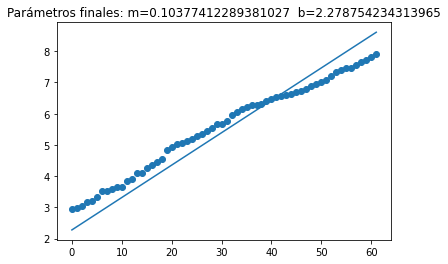

In [135]:
modelo = ModeloLineal()
learning_rate = 0.001
final_parametros = modelo.train(Xin = subGT_Confirmed['day_number'], Yin = subGT_Confirmed['ln(confirmed)'], learning_rate=learning_rate, iterations = 1000, Nprint=100)

In [136]:
## prediccion para el 30 de mayo. 

dates = datetime.date(2020, 5, 30)
numdays = dates - datetime.date(2020,3,22)
ndates = np.array([numdays.days])
ndates = dayNumbers = np.expand_dims(ndates, axis = 1)
ndates = np.hstack((ndates, np.ones_like(dayNumbers)))
predictions = np.exp(np.matmul(ndates, final_parametros))
print(predictions)

[12571.26224727]
